# Imports

In [11]:
!pip install plotly==5.14.1
!pip install "jupyterlab>=3" "ipywidgets>=7.6"
!pip install jupyter-dash
!pip install -U kaleido
!pip install numpy
!pip install pandas
!pip install openpyxl
!pip install seaborn
!pip install matplotlib
!pip install -U scikit-learn
!pip install shap
!pip install xgboost

In [93]:
import numpy as np
import pandas as pd
import openpyxl as xl
import FILibExcel
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb 
import shap

# Data Processing

In [94]:
excel_path = r"../../static/mock/urolithiasis/Stones_Train.xlsx"
artifacts_path = r"../../static/mock/urolithiasis_artifacts/"

In [95]:
tables_dict = FILibExcel.get_all_tables(file_name=excel_path)
df = tables_dict["Table1"]['dataframe']
df = df.fillna(value=0)


worksheet name: катя
tables in worksheet: 1
table name: Table1


In [96]:
df.shape

(74, 62)

In [97]:
df.head()

,POL,VOZRAST,MESTOZIT,DLITLITI,ARGIPER,STOMACH,DGPH,CYSTREN,ENDOCRIN,PYELONEF,...,LEU2,ERIT2,PH2,BELOK2,UDVES2,SALTOXA2,CULTURE2,KOLSEAN,LECHEN,X-RAY
0,1,54,Москва,2001,1,0.0,0,0,0,0.0,...,8750.0,250.0,5.0,0.00,1013.0,1.0,2.0,0.0,3.0,1
1,1,47,Москва,1997,0,1.0,0,0,0,0.0,...,2250.0,250.0,5.0,0.00,1011.0,1.0,2.0,0.0,3.0,1
2,1,63,Москва,1990,1,0.0,1,0,0,1.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,4
3,1,53,Москва,1998,1,0.0,0,1,0,0.0,...,750.0,61500.0,5.0,0.04,1014.0,2.0,2.0,1.0,2.0,3
4,2,53,Москва,2000,1,0.0,0,0,0,0.0,...,2000.0,250.0,5.0,0.00,1020.0,2.0,2.0,1.0,2.0,1


In [98]:
df.columns

Index(['POL', 'VOZRAST', 'MESTOZIT', 'DLITLITI', 'ARGIPER', 'STOMACH', 'DGPH',
       'CYSTREN', 'ENDOCRIN', 'PYELONEF', 'SIZERENT', 'LOCal', 'SIZEUZ',
       'URODYNAM', 'Predlec', 'KREATINI', 'MOCHEV1', 'DRAINAGE', 'CA1', 'К1',
       'NA1', 'URICAC1', 'GLU1', 'OBBELOK1', 'ALBUMIN1', 'BILALL1', 'BILFREE1',
       'LEU1', 'ERIT1', 'PH1', 'BELOK1', 'UDVES1', 'SALTOXA1', 'CULTURE1',
       'ZIMMAX', 'ZIMMIN', 'SIZEMSCT', 'PLOTNOST', 'LOCMSCT', 'NEFROS',
       'DOPPLER', 'KREATIN2', 'MOCHEV2', 'CA2', 'URICAC2', 'NA2', 'KALI2',
       'GLU2', 'OBBELOK2', 'ALBUMIN2', 'BILALL2', 'BILFRE2', 'LEU2', 'ERIT2',
       'PH2', 'BELOK2', 'UDVES2', 'SALTOXA2', 'CULTURE2', 'KOLSEAN', 'LECHEN',
       'X-RAY'],
      dtype='object')

In [99]:
df = df.drop(['MESTOZIT'], axis=1)

In [100]:
df.info(verbose=True)
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 61 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   POL       74 non-null     int64  
 1   VOZRAST   74 non-null     int64  
 2   DLITLITI  74 non-null     int64  
 3   ARGIPER   74 non-null     int64  
 4   STOMACH   74 non-null     float64
 5   DGPH      74 non-null     int64  
 6   CYSTREN   74 non-null     int64  
 7   ENDOCRIN  74 non-null     int64  
 8   PYELONEF  74 non-null     float64
 9   SIZERENT  74 non-null     float64
 10  LOCal     74 non-null     float64
 11  SIZEUZ    74 non-null     float64
 12  URODYNAM  74 non-null     float64
 13  Predlec   74 non-null     float64
 14  KREATINI  74 non-null     float64
 15  MOCHEV1   74 non-null     float64
 16  DRAINAGE  74 non-null     float64
 17  CA1       74 non-null     float64
 18  К1        74 non-null     float64
 19  NA1       74 non-null     float64
 20  URICAC1   74 non-null     float64


POL           int64
VOZRAST       int64
DLITLITI      int64
ARGIPER       int64
STOMACH     float64
             ...   
SALTOXA2    float64
CULTURE2    float64
KOLSEAN     float64
LECHEN      float64
X-RAY         int64
Length: 61, dtype: object

In [101]:
X = df.drop(['X-RAY'], axis=1)
y = df['X-RAY']

In [102]:
X

,POL,VOZRAST,DLITLITI,ARGIPER,STOMACH,DGPH,CYSTREN,ENDOCRIN,PYELONEF,SIZERENT,...,BILFRE2,LEU2,ERIT2,PH2,BELOK2,UDVES2,SALTOXA2,CULTURE2,KOLSEAN,LECHEN
0,1,54,2001,1,0.0,0,0,0,0.0,2.0,...,0.0,8750.00,250.000,5.0,0.000,1013.0,1.0,2.0,0.0,3.0
1,1,47,1997,0,1.0,0,0,0,0.0,2.0,...,0.2,2250.00,250.000,5.0,0.000,1011.0,1.0,2.0,0.0,3.0
2,1,63,1990,1,0.0,1,0,0,1.0,0.4,...,0.0,0.00,0.000,0.0,0.000,0.0,0.0,0.0,0.0,1.0
3,1,53,1998,1,0.0,0,1,0,0.0,0.6,...,0.1,750.00,61500.000,5.0,0.040,1014.0,2.0,2.0,1.0,2.0
4,2,53,2000,1,0.0,0,0,0,0.0,0.7,...,0.1,2000.00,250.000,5.0,0.000,1020.0,2.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2,31,2006,0,0.0,0,0,1,1.0,1.2,...,0.0,7.14,4.577,5.0,0.070,1012.0,1.0,2.0,1.0,4.0
70,1,23,2005,1,0.0,0,0,0,0.0,0.4,...,0.0,0.00,0.000,0.0,0.000,0.0,0.0,0.0,1.0,2.0
71,2,54,1994,1,0.0,0,0,0,1.0,4.0,...,0.0,10.82,4.017,5.0,0.070,1018.0,1.0,1.0,2.0,1.0
72,2,60,2001,1,0.0,0,0,0,1.0,7.0,...,0.0,5.24,4.181,5.5,0.003,1018.0,1.0,0.0,1.0,2.0


## Useful functions

In [103]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]


In [104]:
def draw_importance(importances, model_name, columns=X.columns):
    features = {}
    color1 = "#2D466D"
    color2 = "#A2B0C5"
    for i, feature in enumerate(columns):
        features[f"f{i+1}"] = feature

    indices = np.argsort(importances)[::-1]
    num_to_plot = len(columns)
    feature_indices = [ind + 1 for ind in indices[:num_to_plot]]

    print("Feature ranking:")
    for f in range(num_to_plot):
        print(
            "%d. %s %f "
            % (f + 1, features["f" + str(feature_indices[f])], importances[indices[f]])
        )
    plt.figure(figsize=(20, 10))
    bars = plt.bar(
        range(num_to_plot),
        importances[indices[:num_to_plot]],
        color=get_color_gradient(color1, color2, num_to_plot),
        align="center",
    )
    ticks = plt.xticks(range(num_to_plot), feature_indices, fontsize=22)
    plt.yticks(fontsize=22)
    plt.xlim([-1, num_to_plot])
    plt.legend(bars, [u"".join(features["f" + str(i)]) for i in feature_indices], fontsize="24");
    plt.title(f"Feature importance in {model_name}", fontsize=22)
    plt.savefig(f'{artifacts_path}{model_name}.eps', format='eps', dpi=600, bbox_inches='tight', transparent="True", pad_inches=0)
    

In [105]:
def learn_xgboost(X, y, name):
    parameters = {
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.5, 1, 1.5, 2, 2.5,],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
    }

    model = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, nthread=1, seed=0)
    clf = GridSearchCV(
        model, 
        parameters, 
        cv=5, 
        scoring='f1_micro',
        refit=True,
        n_jobs=-1)
    clf.fit(X, y)
    best_xgboost = clf.best_estimator_
    print(clf.best_score_)
    print(clf.best_params_)
    draw_importance(best_xgboost.feature_importances_, f"XGboost {name}")
    return best_xgboost

## Learning

In [106]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6])

/Users/alexglushko/ProgramProj/ChemML/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/alexglushko/ProgramProj/ChemML/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
1080 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alexglushko/ProgramProj/ChemML/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alexgl

nan
{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6}
Feature ranking:
1. LEU1 0.025438 
2. LEU2 0.023524 
3. LECHEN 0.022385 
4. ERIT1 0.021028 
5. ZIMMAX 0.020819 
6. DLITLITI 0.020748 
7. BELOK2 0.020663 
8. LOCal 0.020410 
9. OBBELOK1 0.020310 
10. SIZERENT 0.019919 
11. ERIT2 0.019873 
12. MOCHEV2 0.019869 
13. GLU1 0.019809 
14. KREATINI 0.019537 
15. STOMACH 0.019452 
16. KREATIN2 0.019309 
17. KOLSEAN 0.018935 
18. POL 0.018853 
19. UDVES2 0.018778 
20. URICAC1 0.018700 
21. PH2 0.018557 
22. ARGIPER 0.018057 
23. SIZEUZ 0.017880 
24. BILALL2 0.017863 
25. PYELONEF 0.017715 
26. VOZRAST 0.017392 
27. ALBUMIN1 0.017374 
28. OBBELOK2 0.017324 
29. ZIMMIN 0.017264 
30. GLU2 0.016983 
31. CA2 0.016914 
32. CULTURE2 0.016789 
33. К1 0.016739 
34. CA1 0.016653 
35. UDVES1 0.016402 
36. BILALL1 0.016088 
37. BILFREE1 0.016057 
38. NA2 0.015874 
39. ALBUMIN2 0.015368 
40. NEFROS 0.015259 
41. MOCHEV1 0.015070 
42. PH1 0.015007 
43. SALTOXA

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


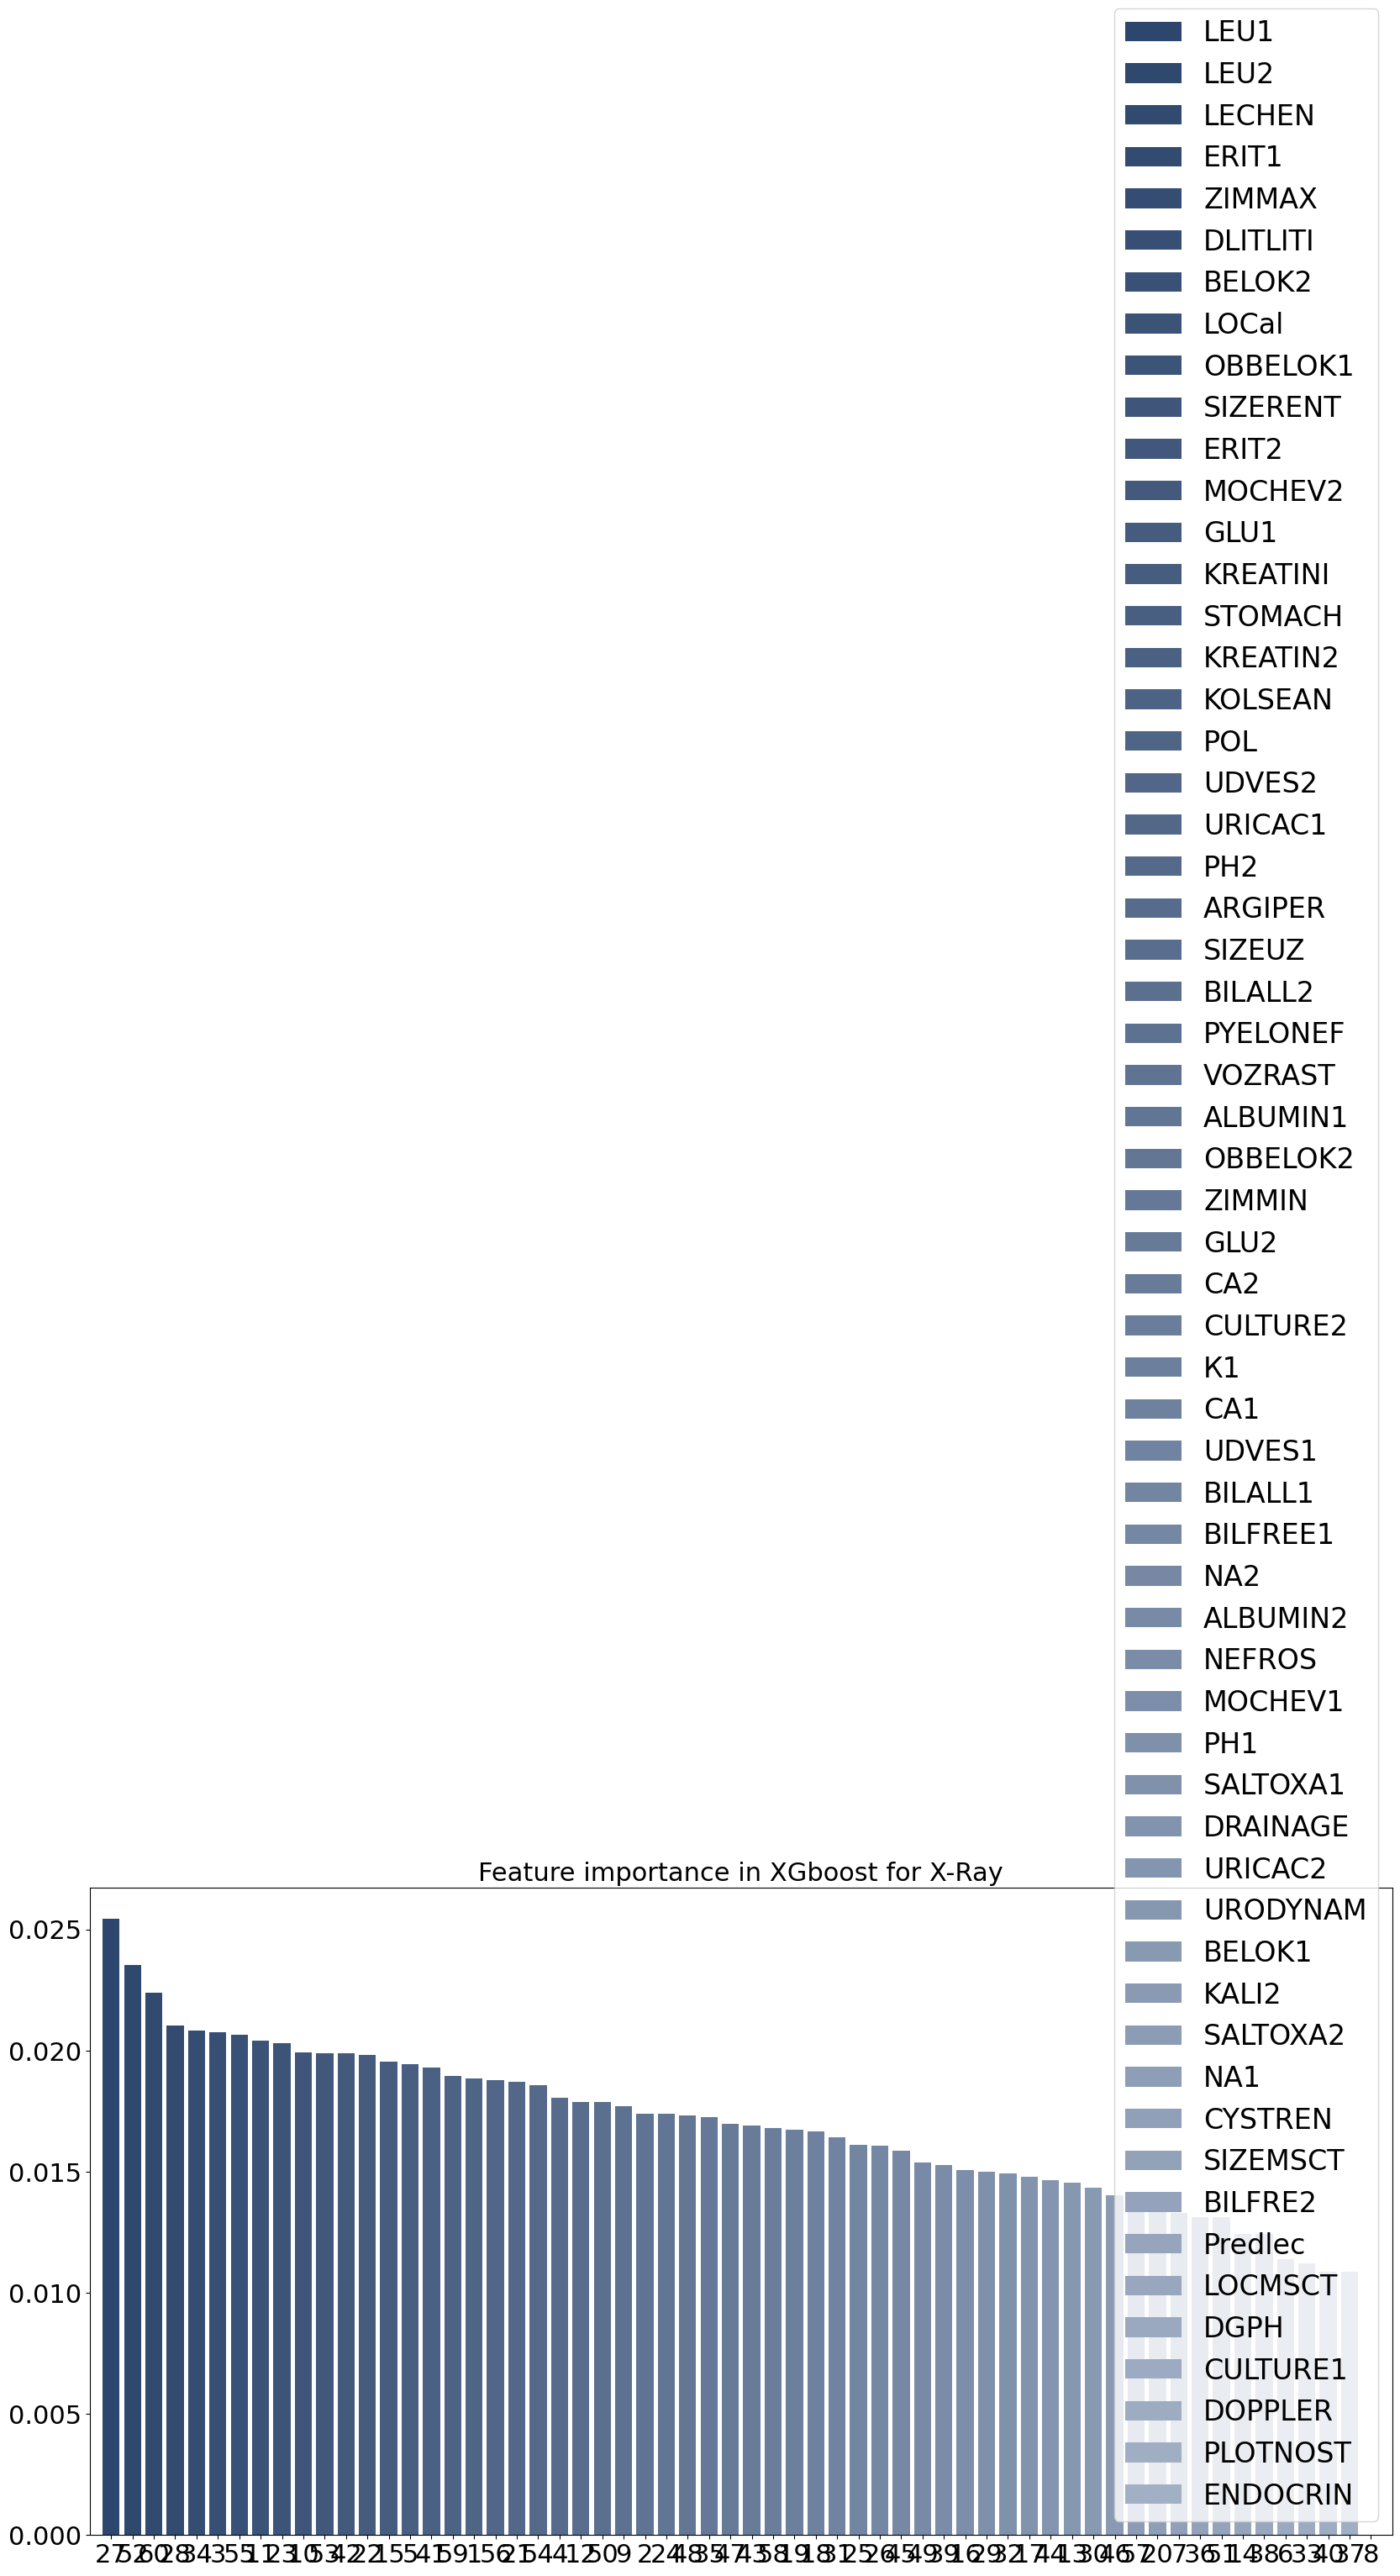

In [107]:
best_model = learn_xgboost(X, y, name="for X-Ray")

## Shap

In [108]:
def explain(model, X=X, name="model", is_save=False, color_bar=False):
    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)
    shap.plots.beeswarm(shap_values, plot_size=[10, 6], s=26, show=False, color_bar=color_bar, max_display=15)
    if is_save:
        plt.tick_params(axis='both', labelsize=16)
        plt.savefig(f'{artifacts_path}{name} shap.png', bbox_inches='tight')
        plt.show()

### XGBoost shap

In [110]:
explain(best_model, name="XGBoot shap", color_bar=True, is_save=True)

ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!